# Inspecting the King County House Sales Data Set

Importing Libraries and the Data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


-----
# Cleaning the Data set

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

After inspecting the dataset we find that there are no null values 

In [4]:
#convert date as it is an object data type
data['date'].dtype
data['date'] = pd.to_datetime(data['date'])
print(data['date'].dtype)

datetime64[ns]


In [5]:
data.info('date')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

 -----------
# Statistical Anaylsis


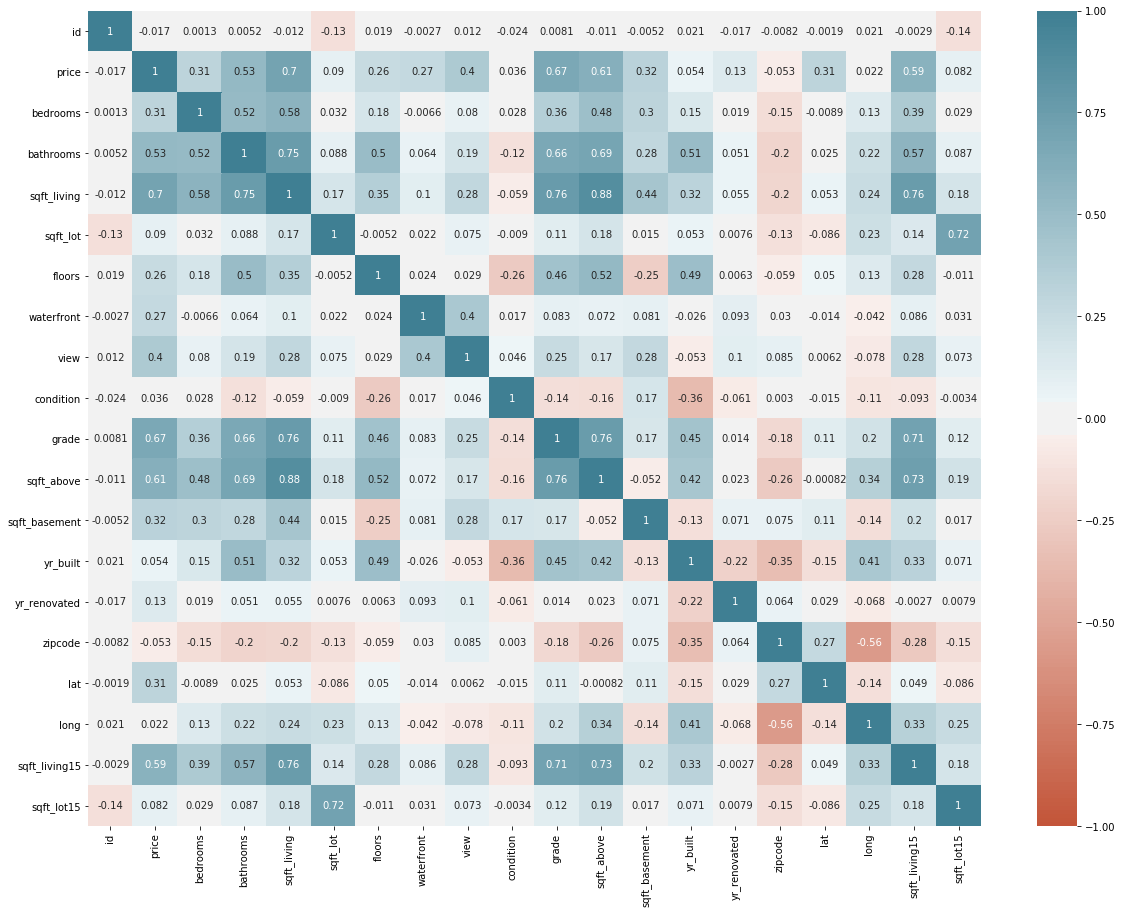

In [6]:
#correlation heatmap between every column
corr_mat = data.corr()
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(corr_mat, annot=True, linewidths=0, vmin=-1, cmap=sns.diverging_palette(20, 220, n=200))

In [7]:
high_corr = corr_mat[(corr_mat>0.75 )&(corr_mat<1)]
high_corr_data = pd.DataFrame(high_corr.unstack().sort_values(ascending = False).drop_duplicates().head(5))
high_corr_data.reset_index().rename(columns={'level_0': 'Feature1', 'level_1': 'Feature2', 0:'Correlation'})

,Feature1,Feature2,Correlation
0,sqft_above,sqft_living,0.876597
1,grade,sqft_living,0.762704
2,sqft_living15,sqft_living,0.756420
3,sqft_above,grade,0.755923
4,sqft_living,bathrooms,0.754665


Looking at the number of times certain Conditions and Grades appear


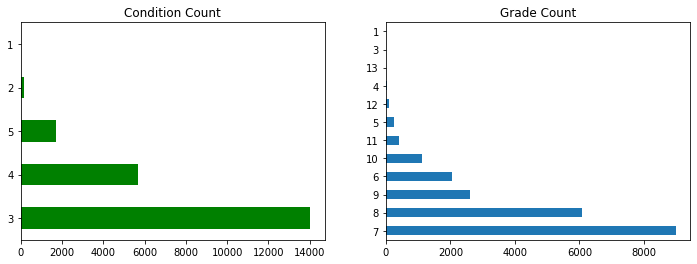

In [8]:
# we can see the number of times a condition appears. 5 being excellent and 1 being unaccaptable.
# as for Grade anything above 10 means that there has been Designer/Custom works done to the House.
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax1 = ax[0]
ax2 = ax[1]
data.condition.value_counts().plot(kind='barh', color='green', ax=ax1, title='Condition Count')
data.grade.value_counts().plot(kind='barh', ax=ax2, title='Grade Count')

# Which price are the most houses being sold and bought at and which price range has most activity and demand

The Real Estate Agency wants to find out which market segment is most active and so we will first find a price range where there is alot of activity and is within their budget so that they can focus on that specific segment.

In [9]:
#we can see the basic statistical info of price column.
data.price.describe().round(-3)

count      22000.0
mean      540000.0
std       367000.0
min        75000.0
25%       322000.0
50%       450000.0
75%       645000.0
max      7700000.0
Name: price, dtype: float64

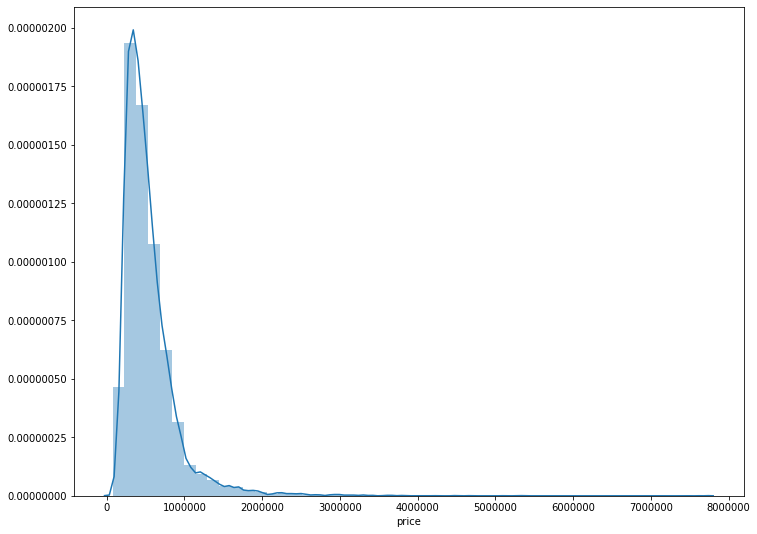

In [10]:
#making a distplot for price column to see what the distribution of prices for houses sold looks like
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
sns.distplot(data['price'])

From the above we can see that most of the house prices center around 600k. We can also see that most houses sold are under 1m. We will create price bands in order to better visualise the trend and then input as a new column in our dataset

##### Price Bands will be:

11 --> 2m+

10 --> 1m+

 9--> 800-999k 
 
 8-->700-800k
 
 7-->600-700k
 
 6-->500-600k
 
 5-->400-500k
 
 4-->300-400k
 
 3-->200-300k
 
 2-->100-200k
 
 1-->under 100k

In [11]:
# Band the price and create a new column that will assign the price band to each house sold
price_list = data['price']
data['price_bands'] = data['price']
tier_arr = []
for idx, price in enumerate(price_list):
    if price >= 2000000:
        tier_arr.append(11)
    elif price >= 1000000:
        tier_arr.append(10)
    elif price >= 800000:
        tier_arr.append(9)
    elif price >= 700000 :
        tier_arr.append(8)
    elif price >= 600000 :
        tier_arr.append(7)
    elif price >= 500000 :
        tier_arr.append(6)
    elif price >= 400000:
        tier_arr.append(5)
    elif price >= 300000:
        tier_arr.append(4)
    elif price >= 200000:
        tier_arr.append(3)
    elif price >= 100000:
        tier_arr.append(2)
    else:
        tier_arr.append(1)       

data['price_bands'] = tier_arr
data.price_bands.head()

0    3
1    6
2    2
3    7
4    6
Name: price_bands, dtype: int64

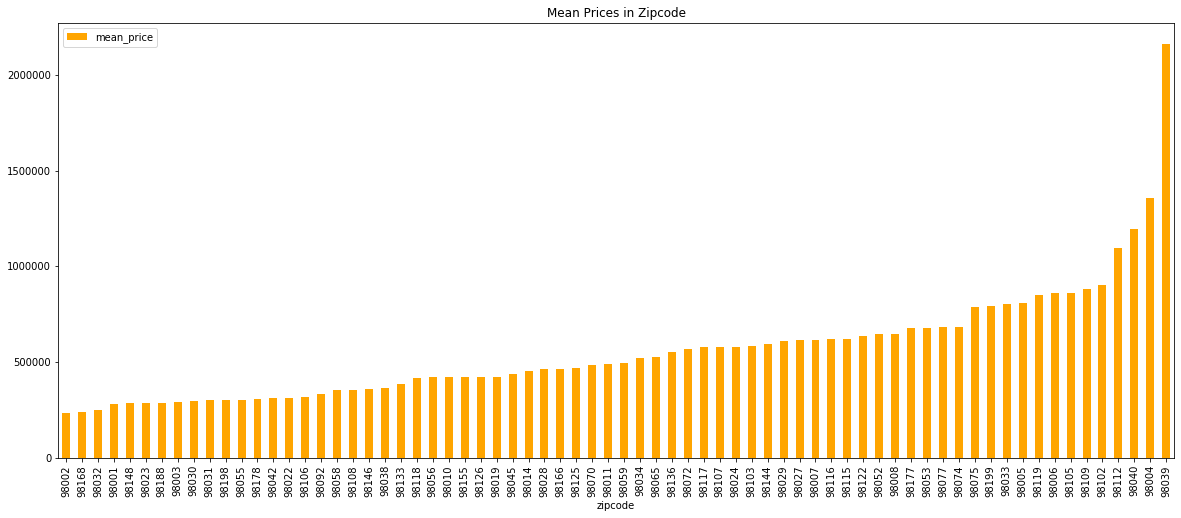

In [12]:
# Mean Price by Zipcode
data.groupby('zipcode').agg(mean_price= ('price', 'mean'))\
.sort_values('mean_price').plot(kind='bar', figsize=(20,8), color='orange', title='Mean Prices in Zipcode')

In [13]:
data.price_bands.value_counts(sort=False)

1       25
2      761
3     3651
4     4257
5     3714
6     2839
7     1954
8     1410
9     1510
10    1287
11     205
Name: price_bands, dtype: int64

We can see for the most part that prices are evenly spread except for the few ourliers under 100k and over 2m in price

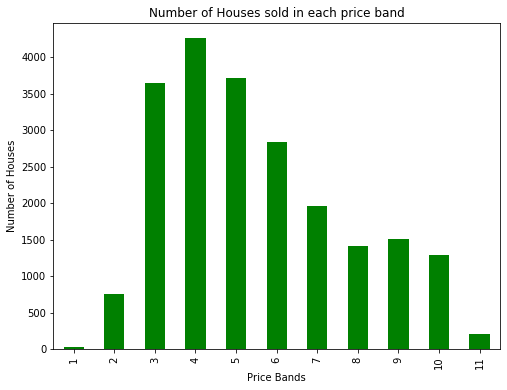

In [14]:
#Slighlty skewed but very close to being a normal distrubiton
data.price_bands.value_counts(sort=False).plot(kind='bar',
                                             title= 'Number of Houses sold in each price band',
                                             figsize=(8,6),
                                             color='green')
plt.xlabel('Price Bands')
plt.ylabel('Number of Houses');

From this we can infer that a high amount of houses are sold in price bands 3-6

In [15]:
#Majority of Houses sold in this price band
price_band_4 = data[data['price_bands'] == 4]['price_bands'].count()
print('Number of houses being sold in Price Band 4:',price_band_4)
percentage_portion = round(price_band_4/len(data['price_bands']) * 100,2)
print('percentage of our houses in this price band:', percentage_portion, "%")

Number of houses being sold in Price Band 4: 4257
percentage of our houses in this price band: 19.7 %


In [16]:
price_band_3_to_6 = data.loc[(data['price_bands'] <= 6) 
       & (data['price_bands'] >=3) , 'price_bands'].count()
print('Number of houses being sold between price band 3-6:',price_band_3_to_6)

percentage_portion = round(price_band_3_to_6/len(data) * 100,2)
print('percentage of houses from total in this price band:', percentage_portion, "%")

Number of houses being sold between price band 3-6: 14461
percentage of houses from total in this price band: 66.91 %


We can see that price band 3-6 accounts for more than 65% houses being bought and sold in our data set. Therefore we should focus our efforts mostly in this price band as it grants us access to a large pool of houses to purchase whilst also containing potential to successfully sell 

-----
# How accuratly can we predict the prices of houses based on certain features using different Machine Learning Techniques

We will be apply a variety of different Machine Learning technciques, including Multiple Linear Regression, KNN and a RandomForest

In [17]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_bands
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,3
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,6
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,7
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,6


In [18]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor


# setting up KFold 
kf = KFold(n_splits=5, shuffle=True, random_state=123)

In [19]:
# we will choose varibales most associated with most sought out features of a house 
X = data[['bedrooms', 'bathrooms', 'grade','condition','floors', 'sqft_above' ,'yr_built']]
y = data['price']

In [20]:
#Multiple Linear Regression
lr = LinearRegression()
cross_val_score(lr, X, y, cv=kf).mean()

0.5838753341223708

In [21]:
#KNN
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

knn = KNeighborsRegressor(n_neighbors=4)
cross_val_score(knn, X_scaled, y, cv=kf).mean()

0.5996873201844259

We scale our data for KNN as KNN measures using uclidean distance. This 'levels the playing field' for all of our features and prevents features such as yr_built from outweighing features like zipcode

In [22]:
#RandomFroest
rfr = RandomForestRegressor(n_estimators=100)
cross_val_score(rfr, X, y, cv=kf).mean()

0.6320224948592117

Random Forest performs the best by far, we will apply GridSearch with different parameters to see if we can get a better score.

In [23]:
grid = {'n_estimators': [100,150,200],
        'max_depth': range (5, 14),
        'min_samples_leaf': [10,20],
        'min_samples_split':[2, 5, 10],
       'max_features': [0.6, 0.7, 0.8]}
gs = GridSearchCV(rfr, grid, cv=kf, n_jobs=-1)
gs.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verb

In [24]:
gs.best_params_

{'max_depth': 13,
 'max_features': 0.7,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 150}

In [25]:
gs.best_score_

0.6638194052467993

In [26]:
data_results = pd.DataFrame(gs.cv_results_)
data_results.pivot_table(index=['param_max_depth', 'param_n_estimators'],
                 columns=['param_min_samples_leaf', 'param_max_features', 'param_min_samples_split'],
                 values='mean_test_score').round(3) \
          .style.background_gradient('coolwarm', axis=None)

In [27]:
gs.best_params_

{'max_depth': 13,
 'max_features': 0.7,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 150}

We can see based off the GridSearch results that we may be able to obtain a better score with a higher max_depth whilst keeping the same parameters constant. We will also use 150 estimators instead of 200 as there is highly minimal difference between the two

In [28]:
rfr = RandomForestRegressor(n_estimators=150, max_features=0.8, min_samples_leaf=10, min_impurity_split=5)
grid = {'max_depth': range(11, 23)}
gs2 = GridSearchCV(rfr, grid, cv=kf, n_jobs=-1)
gs2.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features=0.8,
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=5,
                                             min_samples_leaf=10,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=150, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0

In [29]:
data_results2 = pd.DataFrame(gs2.cv_results_)
data_results2[['param_max_depth','mean_test_score']].style.background_gradient('coolwarm', axis=None)

,param_max_depth,mean_test_score
0,11,0.660241
1,12,0.660738
2,13,0.661383
3,14,0.661105
4,15,0.661157
5,16,0.660641
6,17,0.661984
7,18,0.661883
8,19,0.659853
9,20,0.662651


In [30]:
gs2.best_params_

{'max_depth': 20}

We can see that the max_depth starts to slow down after 14. Although our score still increases past 14, we run the risk of overfitting. A max_depth of 14 improves our score by almost 6% compared to a max_depth of 21 for example which sits at only 1%. In this case we will select a max_depth of 14, a sensible trade off to prevent an over-fitting model 

In [31]:
rfr = RandomForestRegressor(n_estimators=150, max_features=0.8, min_samples_leaf=10, min_impurity_split=5, max_depth=14)
rfr.fit(X,y);

In [32]:
rfr.score(X,y)

0.7333786887674139

We can see that after using our GridSearch we are able to get a score of 73% which will allow us to predict the prices of new houses based on the features we selected with descent accuracy 

# Findings
We cleaned the Dataset, and answered the 2 main questions which are meant to have direct and immediate effects on decision making of our client

We were able to explain and show through analysis the price range that is most suitable for buying and selling

We used different machine learning methods in order to be able to predict the prices of houses based on ceratain features. This allows us to be able help the real estate agency do two important tasks.
1. Be able to predict if a house is worth buying based on the price compared to its features, i.e will the real estate agnecy make a profit by buying/flipping this house?
2. Allow the business to make accurate estimations when selling a house to maximize profits for the features the house has, i.e what is a reasonable price to sell a house with these features while making maximum profits

# Further Works

1. Include more feature engineering. Combining and creating new variables such as calculating the age of the house by using yr_built and Date features. A further feature would be to add specific locations of where the best houses to buy and sell are so the business can focus it's efforts and resources better

2. Building a pipeline for the whole process, do the Imputation, Transformation and Machine Learning all at once
